# AirSonDo_incheon
 - 2019.01.02 01:00 부터 수집을 시작해서 모으는 DATA
 - 모으는데로 간단한 경향 분석을 볼수 있도록 작성
 
 - 환경공단에서 실시간 모으는 자료는 1시간 간격
 - 정리해서 배포하는 자료는 하루평균치로 계산해서 배포한다.
 - 장비 점검으로 인한 결측치는 '청라'의 데이터로 채워넣는다

In [1]:
"""
* 청라, 송도지역 미세먼지 측정값 스크래핑
"""
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from asset.config import *
from asset.simple_plot import *
from asset.get_savelog import get_savelog


# dir_work,
# dir_data,
# dir_data_collect,
# dir_data_realtime,
# dir_data_trash,
# dir_img,
# dir_img_heatmap,
# dir_img_nulschool,
# dir_img_plot_plot,
# dir_img_plot_scatter,
# dir_img_result,
# dir_img_test,


# df_plot


# get_savelog()



In [3]:
# 수집된 데이터의 가장 마지막 화일을 읽어온다.
# file_name  # df.TIMES.tail(1).tolist()[0]
(SAVE_LOG, SAVE_LOG1) = get_savelog()

file_name = os.listdir(dir_data_collect)[-1]    # ['_air_20190109_Wed_1700.csv']

df = pd.read_csv(dir_data_collect + f'/{file_name}')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
TIMES    231 non-null object
Time     231 non-null object
SO2      231 non-null float64
NO2      231 non-null float64
O3       231 non-null float64
CO       231 non-null float64
PM10     231 non-null int64
PM2.5    231 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 14.5+ KB


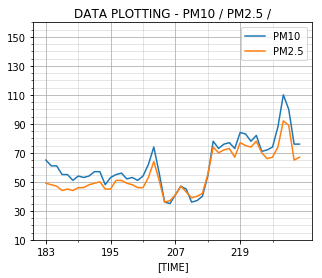

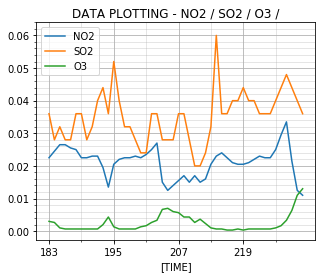

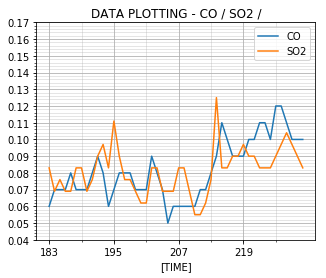

In [4]:
# 마지막 48시간을 끊어서 새로운 DataFrame을 만든다
df48 = df.tail(48)

# 뒤에서 48시간 플로트

df_plot(
    figsize=(5,4),
    df_series_list=[
        df48['PM10'], 
        df48['PM2.5']+18,
    ],
    xy_start=(
        len(df.index) - len(df48.index),
        10,
    ),
    xy_max=(
        df.index.size,
        df48['PM2.5'].max()*2.2,
    ),
    xy_major=(12,20),
    xy_minor=(6,5),
)


# 뒤에서 48시간 플로트

df_plot(    
    figsize=(5,4),
    df_series_list=[
        df48['NO2']/2, 
        df48['SO2']*4,
        df48['O3']/3,
    ],
    xy_start=(
        len(df.index) - len(df48.index),
        0,
    ),
    xy_max=(
        df.index.size,
        df48.SO2.max()*4.4,
    ),
    xy_major=(12,.01),
    xy_minor=(6,.002),
)



# 뒤에서 48시간 플로트

df_plot(    
    figsize=(5,4),
    df_series_list=[
        df48['CO']/10,
        df48['SO2']*7+0.02
    ],
    
    xy_start=(
        len(df.index) - len(df48.index),
        0.04,
    ),
    xy_max=(
        df.index.size,
        df48.CO.max()/7,
    ),
    
    xy_major=(12,.01),
    xy_minor=(6,.002),
)

In [5]:
# 데이터간 연계성(Correlation) 확인 

chk_columns = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5',]
chk_dfs = pd.DataFrame(df48[col] for col in chk_columns)

chk_dfs.T.head(5)   # 방향을 transpose() 시켜줘야 함
chk_dfs.T.corr()

,SO2,NO2,O3,CO,PM10,PM2.5
SO2,1.000000,0.270957,-0.084065,0.521720,0.657137,0.640506
NO2,0.270957,1.000000,-0.656621,0.423568,0.494113,0.371527
O3,-0.084065,-0.656621,1.000000,-0.140961,-0.049352,-0.058087
CO,0.521720,0.423568,-0.140961,1.000000,0.828380,0.858744
PM10,0.657137,0.494113,-0.049352,0.828380,1.000000,0.962736
PM2.5,0.640506,0.371527,-0.058087,0.858744,0.962736,1.000000


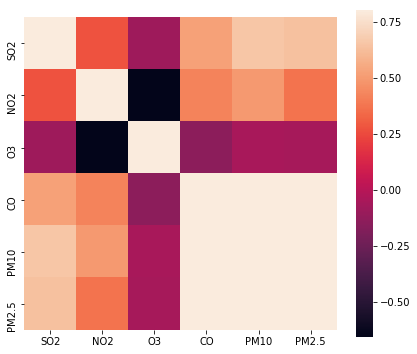

In [6]:
# Correlation Heatmap 확인 (양/음의 관계 강도를 이미지로 보여줌)
# sns.heatmap(chk_dfs.T.corr())

f, ax = plt.subplots(figsize=(7,6))
sns.heatmap(chk_dfs.T.corr(), vmax=.8, square=True)

# 48시간 히트맵만 저장하자!
plt.savefig(dir_img_result + f'/total_heatmap_{SAVE_LOG1}.png')

In [7]:
# 전체 데이터의 인덱스를 12/24시간 간격으로 마킹한다.
X_INDEX = [_date if _idx is 0 or _idx%12 is 0 else '' for _idx, _date in enumerate(df.index.tolist())]

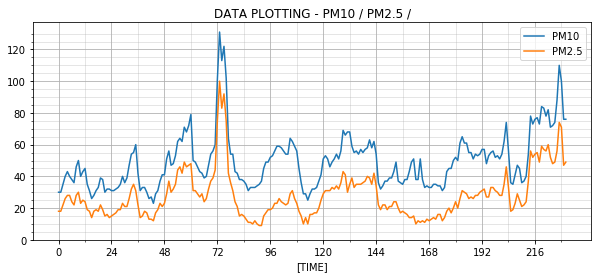

2019.01/11(Fri)-15:00


In [8]:
# 전체 플로트
df_plot(
    df_series_list=[
        df['PM10'], 
        df['PM2.5'],
    ],
    figsize=(10,4),
    xy_start=(0,0),
    xy_max=(
        df.index.size,
        np.max(df.PM10),
    ),
    xy_major=(24,20),
    xy_minor=(12,5),
)

# plt.xticks(X_INDEX, rotation=90)    #... Why? 왜 에러??
plt.show()

print(df.TIMES.tail(1).tolist()[0])

In [9]:
df.tail(3)

,TIMES,Time,SO2,NO2,O3,CO,PM10,PM2.5
228,2019.01/11(Fri)-13:00,2019-01-11 13:00:00,0.011,0.043,0.019,1.0,100,71.0
229,2019.01/11(Fri)-14:00,2019-01-11 14:00:00,0.010,0.025,0.033,1.0,76,47.0
230,2019.01/11(Fri)-15:00,2019-01-11 15:00:00,0.009,0.022,0.039,1.0,76,49.0
